In [8]:
import numpy as np
import torch
import ROOT

import CMS_lumi

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (4,4)

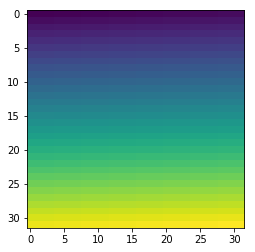

In [9]:
npimg = np.arange(32*32).reshape(32,32)
plt.imshow(npimg)
plt.show()

m(a) = 400 MeV


'\npalette = h[k].GetListOfFunctions().FindObject("palette")\npalette.SetX1NDC(0.815)\npalette.SetX2NDC(0.865)\npalette.SetY2NDC(0.92)\n#c[k].Update()\n#if print_png: c[k].Print(\'%s/%sMeV.png\'%(plot_dir, k))\n#if print_pdf: c[k].Print(\'%s/%s.pdf\'%(plot_dir, k))\n'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cshower


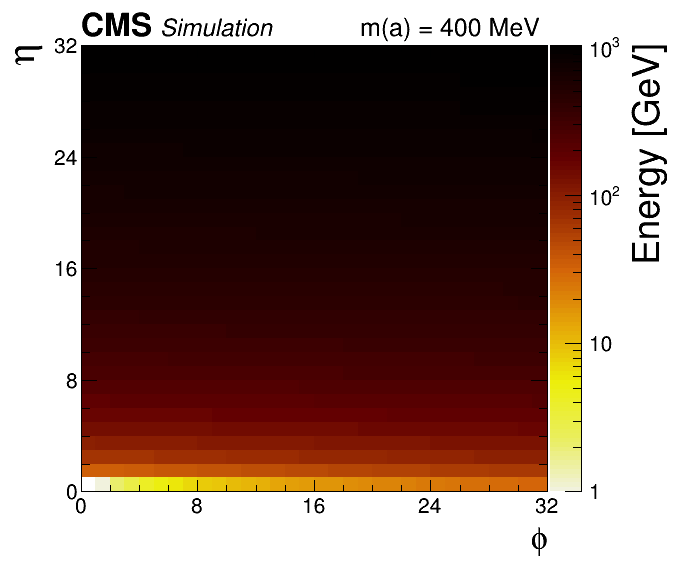

In [57]:
wd, ht = int(640*1), int(680*1)
h, c = {}, {}

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Simulation"
CMS_lumi.lumi_sqrtS = "m(a) = 400 MeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.17
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(680*1), int(600*1)
ROOT.TGaxis.fgMaxDigits = 3
ROOT.gStyle.SetOptStat(0)

k = 'shower'
c[k] = ROOT.TCanvas("c%s"%k, "c%s"%k, wd, ht)
h[k] = ROOT.TH2F(k, k, 32, 0., 32., 32, 0., 32.)

s = 'data2017'
for ir in range(32):
    for ic in range(32):
        binc = npimg[ir,ic]
        if binc != 0:
            h[k].Fill(ic, ir, binc)

c[k].cd()
c[k].SetLogz()
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.12)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(56)#53
h[k].SetTitle('')

h[k].GetXaxis().SetTitleFont(42)
h[k].GetXaxis().SetLabelFont(42)
h[k].GetXaxis().SetTitle('#phi')
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
h[k].GetXaxis().SetNdivisions(-404)

h[k].GetYaxis().SetTitleFont(42)
h[k].GetYaxis().SetLabelFont(42)
h[k].GetYaxis().SetTitle('#eta')
h[k].GetYaxis().SetTitleOffset(0.7)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetYaxis().SetNdivisions(-404)

h[k].GetZaxis().SetTitle('Energy [GeV]')
h[k].GetZaxis().SetTitleOffset(0.9)
h[k].GetZaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetTitleFont(42)
h[k].GetZaxis().SetLabelFont(42)

#h[k].SetMaximum(60.)
h[k].SetContour(100)
h[k].Draw("COL Z")
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
'''
palette = h[k].GetListOfFunctions().FindObject("palette")
palette.SetX1NDC(0.815)
palette.SetX2NDC(0.865)
palette.SetY2NDC(0.92)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
#if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))
'''

In [51]:
X = np.arange(4*4).reshape(4,1,2,2) # (samples, layers, rows, cols)
print(X.shape)
print(X)
print(X[0,0,0,0])
print(X[1,0,0,1])
print(X[2,0,1,0])
print(X[3,0,1,1])

(4, 1, 2, 2)
[[[[ 0  1]
   [ 2  3]]]


 [[[ 4  5]
   [ 6  7]]]


 [[[ 8  9]
   [10 11]]]


 [[[12 13]
   [14 15]]]]
0
5
10
15


In [54]:
idxs = np.array([1,0])#.reshape(1,1,2)
#print(idxs)

idxs = np.array([[1,0],[0,0]])#.reshape(1,1,2)
#print(idxs)
#print(idxs.shape)

idxs = np.array([
#    [(0,0),(1,1)],
#    (0,1),
#    (1,0),
#    (1,1)
    [[0,0],[1,1]],
    [0,1],
    [1,0],
    [1,1]
])
print(idxs)
print(idxs.shape)

[[list([0, 0]) list([1, 1])]
 [0 1]
 [1 0]
 [1 1]]
(4, 2)


In [65]:
tows = [x[0][tuple(idx)] for x,idx in zip(X,idxs)]
print(tows)
tows = np.array(tows).flatten()
print(tows)

[array([1, 1]), 5, 10, 15]
[array([1, 1]) 5 10 15]


In [57]:
idxs_dict = {i:np.array(c) for i,c in enumerate(idxs)}
idxs_dict

{0: array([list([0, 0]), list([1, 1])], dtype=object),
 1: array([0, 1], dtype=object),
 2: array([1, 0], dtype=object),
 3: array([1, 1], dtype=object)}

In [58]:
#tows = [x[0][idxs_dict[i]] for i,x in enumerate(X)]
tows = [idxs_dict[i] for i,x in enumerate(X)]
tows

[array([list([0, 0]), list([1, 1])], dtype=object),
 array([0, 1], dtype=object),
 array([1, 0], dtype=object),
 array([1, 1], dtype=object)]

In [62]:
X_t = torch.Tensor(X)
print(X_t.size())
idxs_t = torch.Tensor(idxs)

torch.Size([4, 1, 2, 2])


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, int64, int32, int16, int8, uint8, and bool.